## Доступные датасеты

Cуществует 4 датасета, которые в основном используются в статьях:
- Backblaze dataset (https://www.kaggle.com/datasets/thedevastator/hard-drive-reliability-data-set; here are new datasets https://www.backblaze.com/b2/hard-drive-test-data.html)
- University of California dataset (ссылка устарела http://cmrr.ucsd.edu/smart, можно найти тут (ссылка актуальна для 2006г) https://web.archive.org/web/20100611213812/http://cmrr.ucsd.edu/people/hughes/smart/dataset/harddrive1.zip)
- Quantum Corporation dataset -- ??
- Baidu dataset - не нашла в открытом доступе (есть вот этот https://www.kaggle.com/datasets/drtycoon/baidu-hdds-dataset-2017 возможно можно использовать его, однако он имеет 14 признаков, тогда как статьи, использующие этот датасет, упоминают про 23 признака)

## Datasets EDAs


### University of california dataset analysis

In [1]:
from scipy.io import arff

import pandas as pd

data = arff.loadarff('./uc/harddrive1.arff')
df_uc = pd.DataFrame(data[0])

df_uc.head()

,serial,Frame,Hours,HoursBeforeFail,Temp1,Temp2,Temp3,Temp4,FlyHeight1,FlyHeight2,...,ReadError18,ReadError19,Servo7,Servo8,ReadError20,GList2,GList3,Servo9,Servo10,class
0,b'100001',0.0,0.000,2.216,10.0,0.0,0.0,10.0,7962.0,8986.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
1,b'100001',1.0,0.000,2.216,12.0,0.0,0.0,12.0,7972.0,8991.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,b'1'
2,b'100001',2.0,0.016,2.200,11.0,0.0,10.0,11.0,7949.0,8981.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,128.0,b'1'
3,b'100001',6.0,0.050,2.166,9.0,0.0,0.0,11.0,7955.0,8982.0,...,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,576.0,b'1'
4,b'100001',7.0,0.083,2.133,7.0,0.0,0.0,9.0,7964.0,8984.0,...,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,576.0,b'1'


Не совсем понятна корелляция признаков датасета со SMART параметрами жесткого диска, поэтому временно исследование данного датасета временно было отложено.

### Backblaze dataset analysis EDA
#### Preliminary

In [2]:
import os
import glob

# Concatenating all datasets (one dataset per month 2017) to one
df_bb = pd.concat(map(pd.read_csv, glob.glob("./backblaze/*.csv")))
df_bb.head()

,index,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,0,2017-01-01,MJ0351YNG9Z0XA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,135.0,108.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,2017-01-01,MJ0351YNG9WJSA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,136.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,2017-01-01,PL1321LAG34XWH,Hitachi HDS5C4040ALE630,4000787030016,0,100,0,134.0,101.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,2017-01-01,MJ0351YNGABYAA,Hitachi HDS5C3030ALA630,3000592982016,0,100,0,136.0,104.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,2017-01-01,Z305B2QN,ST4000DM000,4000787030016,0,113,58173272,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_bb.shape

(1031501, 96)

In [4]:
df_bb['failure'].value_counts()

0    1031456
1         45
Name: failure, dtype: int64

In [5]:
print(df_bb.groupby('model')['failure'].sum().sort_values(ascending=False).iloc[:30])

model
ST4000DM000                24
HGST HMS5C4040BLE640       10
Hitachi HDS5C3030ALA630     3
ST4000DX000                 2
TOSHIBA MQ01ABF050          2
ST8000DM002                 1
ST6000DX000                 1
WDC WD30EFRX                1
Hitachi HDS723030ALA640     1
WDC WD1600AAJS              0
WDC WD10EADX                0
WDC WD10EACS                0
WDC WD10EADS                0
WDC WD2500AAJS              0
WDC WD1000FYPS              0
TOSHIBA MD04ABA500V         0
WDC WD1600BPVT              0
WDC WD2500BPVT              0
WDC WD2500BEVT              0
TOSHIBA DT01ACA300          0
WDC WD3200AAJS              0
WDC WD3200BEKX              0
WDC WD3200LPVX              0
WDC WD40EFRX                0
WDC WD5000BPKT              0
WDC WD5000LPCX              0
WDC WD5000LPVX              0
WDC WD5002ABYS              0
WDC WD5003ABYX              0
TOSHIBA MD04ABA400V         0
Name: failure, dtype: int64


Таким образом, датасет имеет 1031501 записей о жестких дисках, из которых 45 дисков отказали.
Так как каждый поставщик дисков поставляет значения SMART параметров своим способом, правильнее выбрать одну модель диска и прогнозировать ее отказ. 
Так как больше всего отказавших дисков было модели ST4000DM000, можно взять эту модель. 

In [6]:
df_bb = df_bb.query('model == "ST4000DM000"')
df_bb.shape

(486316, 96)

24 отказавших диска для датасета из 486316 наблюдений --- очень маленькое количество, поэтому хочется взять датасет, где отказавших дисков больше.
Нашла вот этот: https://www.kaggle.com/datasets/awant08/hard-drive-failure-prediction-st4000dm000

In [7]:
import pandas as pd

# Concatenating all datasets (one dataset per month 2017) to one
##df_bb = pd.concat(map(pd.read_csv, glob.glob("./backblaze_ST4000DM000/*.csv")))
df_bb = pd.read_csv('./backblaze_ST4000DM000/model_2018_ST4000DM000.csv')
df_bb.head()

,date,serial_number,model,capacity_bytes,failure,smart_1_normalized,smart_1_raw,smart_2_normalized,smart_2_raw,smart_3_normalized,...,smart_250_normalized,smart_250_raw,smart_251_normalized,smart_251_raw,smart_252_normalized,smart_252_raw,smart_254_normalized,smart_254_raw,smart_255_normalized,smart_255_raw
0,2018-01-01,Z3016TK2,ST4000DM000,4000787030016,0,115.0,87117728.0,NaN,NaN,96.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-01-01,W300GLSS,ST4000DM000,4000787030016,1,111.0,40108520.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-01-01,Z302SXQ0,ST4000DM000,4000787030016,0,119.0,208926768.0,NaN,NaN,94.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-01-01,Z3025L3F,ST4000DM000,4000787030016,1,111.0,30947064.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-01-01,Z302SW9C,ST4000DM000,4000787030016,0,117.0,137764288.0,NaN,NaN,92.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
#df_bb = df_bb.sample(n=10000, random_state = 42)
df_bb['failure'].value_counts()

0    367482
1     12596
Name: failure, dtype: int64

В этом датасете отказавших дисков больше, и они все одной модели.

####  Data cleaning
Будем работать с нормализованными данными.

In [9]:
#df_bb.drop(['failure', 'serial_number'], inplace=True, axis=1)
df_bb_normalized = df_bb[df_bb.columns.drop(list(df_bb.filter(regex='raw')))]
feat_names_normalized = df_bb_normalized.columns.values
print("Dataset with normalized features values", feat_names_normalized)
print(df_bb_normalized.shape)

Dataset with normalized features values ['date' 'serial_number' 'model' 'capacity_bytes' 'failure'
 'smart_1_normalized' 'smart_2_normalized' 'smart_3_normalized'
 'smart_4_normalized' 'smart_5_normalized' 'smart_7_normalized'
 'smart_8_normalized' 'smart_9_normalized' 'smart_10_normalized'
 'smart_11_normalized' 'smart_12_normalized' 'smart_13_normalized'
 'smart_15_normalized' 'smart_22_normalized' 'smart_177_normalized'
 'smart_179_normalized' 'smart_181_normalized' 'smart_182_normalized'
 'smart_183_normalized' 'smart_184_normalized' 'smart_187_normalized'
 'smart_188_normalized' 'smart_189_normalized' 'smart_190_normalized'
 'smart_191_normalized' 'smart_192_normalized' 'smart_193_normalized'
 'smart_194_normalized' 'smart_195_normalized' 'smart_196_normalized'
 'smart_197_normalized' 'smart_198_normalized' 'smart_199_normalized'
 'smart_200_normalized' 'smart_201_normalized' 'smart_220_normalized'
 'smart_222_normalized' 'smart_223_normalized' 'smart_224_normalized'
 'smart_225_n

In [10]:
df_bb_normalized.isnull().sum()

date                         0
serial_number                0
model                        0
capacity_bytes               0
failure                      0
smart_1_normalized          16
smart_2_normalized      380078
smart_3_normalized          16
smart_4_normalized          16
smart_5_normalized          16
smart_7_normalized          16
smart_8_normalized      380078
smart_9_normalized          16
smart_10_normalized         16
smart_11_normalized     380078
smart_12_normalized         16
smart_13_normalized     380078
smart_15_normalized     380078
smart_22_normalized     380078
smart_177_normalized    380078
smart_179_normalized    380078
smart_181_normalized    380078
smart_182_normalized    380078
smart_183_normalized        16
smart_184_normalized        16
smart_187_normalized        16
smart_188_normalized        16
smart_189_normalized        16
smart_190_normalized        16
smart_191_normalized        16
smart_192_normalized        16
smart_193_normalized        16
smart_19

Как видим, в датасете есть много признаков без значений. Удалим их.

In [11]:
columns_with_values = df_bb_normalized.columns[df_bb_normalized.isnull().sum() <= 32]
df_bb_normalized = df_bb_normalized[columns_with_values]
df_bb_normalized.isnull().sum()

date                     0
serial_number            0
model                    0
capacity_bytes           0
failure                  0
smart_1_normalized      16
smart_3_normalized      16
smart_4_normalized      16
smart_5_normalized      16
smart_7_normalized      16
smart_9_normalized      16
smart_10_normalized     16
smart_12_normalized     16
smart_183_normalized    16
smart_184_normalized    16
smart_187_normalized    16
smart_188_normalized    16
smart_189_normalized    16
smart_190_normalized    16
smart_191_normalized    16
smart_192_normalized    16
smart_193_normalized    16
smart_194_normalized    16
smart_197_normalized    16
smart_198_normalized    16
smart_199_normalized    16
smart_240_normalized    16
smart_241_normalized    16
smart_242_normalized    16
dtype: int64

In [12]:
df_bb_normalized['capacity_bytes'].value_counts()

 4000787030016    380062
-1                    16
Name: capacity_bytes, dtype: int64

У большинства дисков установлено значение capacity_bytes = 4000787030016. Удалим этот признак.

In [13]:
df_bb_normalized['smart_10_normalized'].value_counts()

100.0    380062
Name: smart_10_normalized, dtype: int64

Все наблюдения имеют значение признака smart_10_normalized = 100. Удалим этот признак.

In [14]:
df_bb_normalized['smart_188_normalized'].value_counts()

100.0    380061
99.0          1
Name: smart_188_normalized, dtype: int64

Почти все наблюдения имеют значение признака smart_188_normalized = 100. Удалим этот признак.

In [15]:
df_bb_normalized['smart_191_normalized'].value_counts()

100.0    380062
Name: smart_191_normalized, dtype: int64

Все наблюдения имеют значение признака smart_191_normalized = 100. Удалим этот признак.

In [16]:
df_bb_normalized['smart_192_normalized'].value_counts()

100.0    380062
Name: smart_192_normalized, dtype: int64

Все наблюдения имеют значение признака smart_192_normalized = 100. Удалим этот признак.

In [17]:
df_bb_normalized['smart_199_normalized'].value_counts()

200.0    380062
Name: smart_199_normalized, dtype: int64

Все наблюдения имеют значение признака smart_199_normalized=200. Удалим этот признак.

In [18]:
df_bb_normalized['smart_240_normalized'].value_counts()

100.0    380062
Name: smart_240_normalized, dtype: int64

In [19]:
df_bb_normalized['smart_241_normalized'].value_counts()

100.0    380062
Name: smart_241_normalized, dtype: int64

In [20]:
df_bb_normalized['smart_242_normalized'].value_counts()

100.0    380062
Name: smart_242_normalized, dtype: int64

Рассмотренные выше признаки аналогично нужно удалить.

In [21]:
features_to_drop = ['capacity_bytes', 'smart_10_normalized', 'smart_188_normalized', 'smart_191_normalized', 'smart_192_normalized',
                   'smart_199_normalized', 'smart_240_normalized', 'smart_241_normalized', 'smart_242_normalized']

string_columns = ['serial_number', 'date', 'model']

In [22]:
df_bb_normalized = df_bb_normalized.drop(features_to_drop, axis=1)
df_bb_normalized = df_bb_normalized.drop(string_columns, axis=1)

df_bb_normalized.shape

(380078, 17)

В результате чистки осталось 18 признаков.

Посмотрим на корелляции признаков.

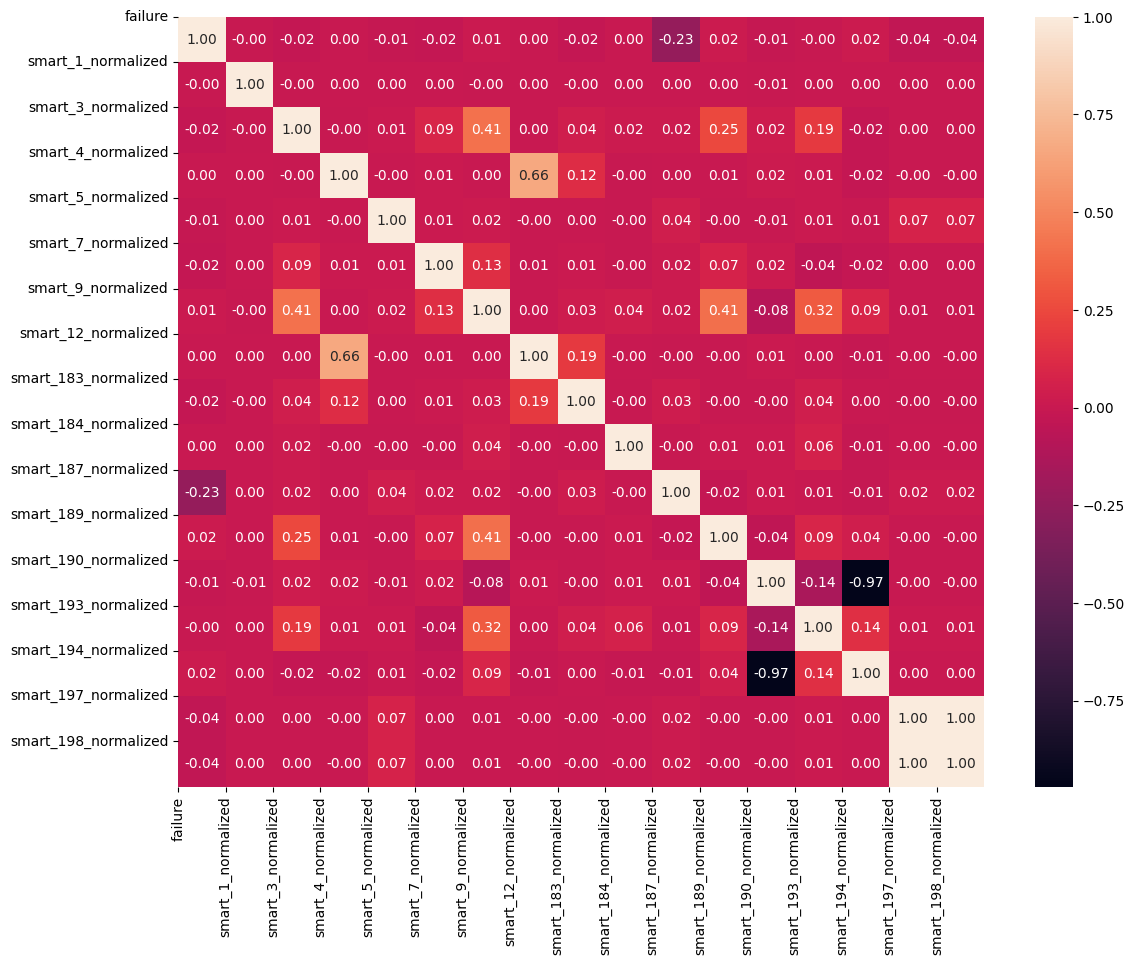

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#df_bb_numeric = df_bb_normalized.drop(columns=string_columns, axis=1)

corr = df_bb_normalized.corr()
#Plot figsize
fig, ax = plt.subplots(figsize=(13, 10))
#Generate Heat Map, allow annotations and place floats in map
sns.heatmap(corr, annot=True, fmt=".2f")
#Apply xticks
plt.xticks(range(len(corr.columns)), corr.columns);
#Apply yticks
plt.yticks(range(len(corr.columns)), corr.columns)
#show plot
plt.show()

Из графика видно, что очень высокую корелляцию имеют признаки smart_194_normalized и smart_190_normalized. Такое значение корелляции кажется логичным, так как, исходя из [описания](https://ru.wikipedia.org/wiki/S.M.A.R.T.):
- 190 --- Температура воздуха внутри корпуса жёсткого диска. Для дисков Seagate рассчитывается по формуле 100-HDA temperature. Для дисков Western Digital — 125-HDA.
- 194 --- Здесь хранятся показания встроенного термодатчика для механической части диска — «банки» (HDA — Head and Disk Assembly). Информация снимается со встроенного термодатчика, которым служит одна из магнитных головок — обычно нижняя в банке. В битовых полях атрибута фиксируются текущая, минимальная и максимальная температура. Не все программы, работающие со SMART, правильно разбирают эти поля, так что к их показаниям стоит относиться критически.

Поэтому можем удалить какой-либо из этих двух признаков. Удалим 190.

In [24]:
df_bb_normalized = df_bb_normalized.drop(['smart_190_normalized'], axis=1)

In [25]:
df_bb_normalized.head()

,failure,smart_1_normalized,smart_3_normalized,smart_4_normalized,smart_5_normalized,smart_7_normalized,smart_9_normalized,smart_12_normalized,smart_183_normalized,smart_184_normalized,smart_187_normalized,smart_189_normalized,smart_193_normalized,smart_194_normalized,smart_197_normalized,smart_198_normalized
0,0,115.0,96.0,100.0,100.0,89.0,62.0,100.0,100.0,100.0,100.0,98.0,98.0,30.0,100.0,100.0
1,1,111.0,92.0,100.0,100.0,81.0,58.0,100.0,100.0,100.0,100.0,97.0,70.0,24.0,100.0,100.0
2,0,119.0,94.0,100.0,100.0,90.0,77.0,100.0,100.0,100.0,100.0,100.0,90.0,31.0,100.0,100.0
3,1,111.0,92.0,100.0,100.0,85.0,68.0,100.0,100.0,100.0,100.0,90.0,95.0,23.0,100.0,100.0
4,0,117.0,92.0,100.0,100.0,90.0,78.0,100.0,100.0,100.0,100.0,100.0,95.0,36.0,100.0,100.0


#### Hypothesis check

Разобьем данные.

In [26]:
from sklearn.model_selection import train_test_split

X = df_bb_normalized.drop('failure', axis=1)
y = df_bb_normalized['failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (285058, 15)
Shape of X_test:  (95020, 15)
Shape of y_train:  (285058,)
Shape of y_test (95020,)


Заполним пропущенные значения.

In [27]:
numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_mean)
X_test = X_test.fillna(numeric_mean)

X_train.isnull().sum()
X_test.isnull().sum()

smart_1_normalized      0
smart_3_normalized      0
smart_4_normalized      0
smart_5_normalized      0
smart_7_normalized      0
smart_9_normalized      0
smart_12_normalized     0
smart_183_normalized    0
smart_184_normalized    0
smart_187_normalized    0
smart_189_normalized    0
smart_193_normalized    0
smart_194_normalized    0
smart_197_normalized    0
smart_198_normalized    0
dtype: int64

#### Applying SVM (using all parameters)

В качестве начального эксперимента обучим модель с использованием логистической регрессии, взяв все параметры SMART, которые получились в результате чистки.

In [28]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

parameters = { 'kernel' : ['linear'],
               'C' : [1,10,100,1000,10000],
               'random_state' : [42]
}
#model = GridSearchCV(SVC(random_state=42, max_iter=100000), parameters, scoring='roc_auc', cv = 3)
model = SVC(random_state=42, max_iter=400000)
model.fit(X_train, y_train)

SVC(max_iter=400000, random_state=42)

Посчитаем получившуюся точность на тренировочных и тестовых данных с использованием метрики AUC ROC. Рассмотрим значения confusion matrix для получившейся модели.

Training set using ovo classifier:  0.9674662700222411
Test set using ovo classifier:  0.9666070300989266


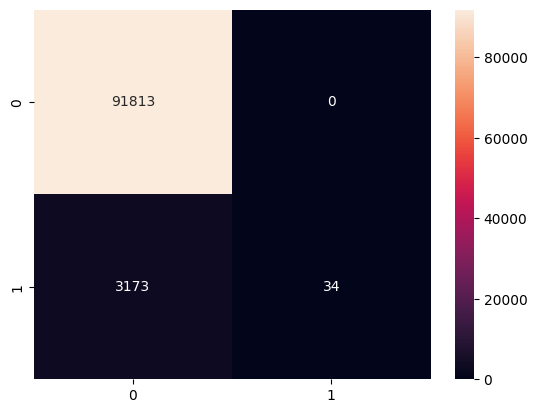

In [29]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_lr_train = model.predict(X_train)
accuracy_lr_train_ovo = accuracy_score(y_train, y_pred_lr_train)
print("Training set using ovo classifier: ", accuracy_lr_train_ovo)#, " time for training: ", training_time_lr_ovo)

y_pred_lr_test = model.predict(X_test)
accuracy_lr_test_ovo = accuracy_score(y_test, y_pred_lr_test)
print("Test set using ovo classifier: ", accuracy_lr_test_ovo)
sns.heatmap(confusion_matrix(y_test, y_pred_lr_test), annot=True, fmt='.0f')
plt.show()

In [30]:
y_test.value_counts()

0    91813
1     3207
Name: failure, dtype: int64

#### Applying SVM on 5 critical parameters
У нас есть следующие параметры, cогласно [описанию](https://ru.wikipedia.org/wiki/S.M.A.R.T.) некоторые из них критически влияют на возникновение отказа диска:
- smart_1_normalized      
- smart_3_normalized      
- smart_4_normalized      
- smart_5_normalized:      critical
- smart_7_normalized      
- smart_9_normalized      
- smart_12_normalized     
- smart_183_normalized    
- smart_184_normalized:    critical
- smart_187_normalized:    critical
- smart_189_normalized    
- smart_193_normalized    
- smart_194_normalized    
- smart_197_normalized:    critical
- smart_198_normalized:    critical

Возьмем для обучения модели с использованием SVM только критические параметры.

In [31]:
X =  df_bb_normalized[['smart_5_normalized', 'smart_184_normalized',
                                             'smart_187_normalized','smart_197_normalized', 'smart_198_normalized']]
y = df_bb_normalized['failure']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 42)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (285058, 5)
Shape of X_test:  (95020, 5)
Shape of y_train:  (285058,)
Shape of y_test (95020,)


In [32]:
numeric_data = X_train.select_dtypes([np.number])
numeric_mean = numeric_data.mean()
numeric_features = numeric_data.columns

X_train = X_train.fillna(numeric_mean)
X_test = X_test.fillna(numeric_mean)

X_train.isnull().sum()
X_test.isnull().sum()

smart_5_normalized      0
smart_184_normalized    0
smart_187_normalized    0
smart_197_normalized    0
smart_198_normalized    0
dtype: int64

In [33]:
import time

t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)
model = SVC(random_state=42)
model.fit(X_train, y_train)
t = time.localtime()
current_time = time.strftime("%H:%M:%S", t)
print(current_time)

21:46:44
21:48:54


Training set using ovo classifier:  0.9703218292417684
Test set using ovo classifier:  0.9697011155546201


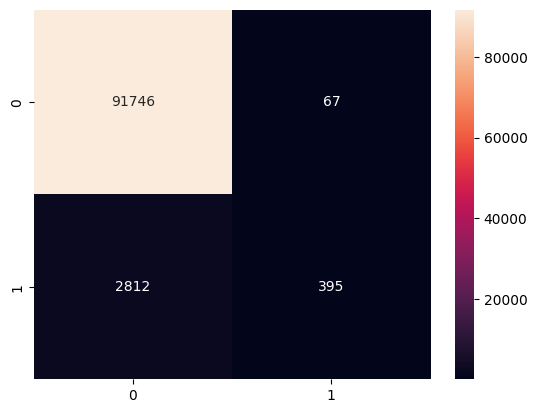

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

y_pred_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, y_pred_train)
print("Training set using ovo classifier: ", accuracy_train)

y_pred_test = model.predict(X_test)
accuracy_test = accuracy_score(y_test, y_pred_test)
print("Test set using ovo classifier: ", accuracy_test)
sns.heatmap(confusion_matrix(y_test, y_pred_test), annot=True, fmt='.0f')
plt.show()